In [1]:
%pylab inline
import datetime
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

import eclipse_calc

Populating the interactive namespace from numpy and matplotlib


In [2]:
map_prm = {}
if False:
    map_prm['llcrnrlon'] = -130.
    map_prm['llcrnrlat'] = 20
    map_prm['urcrnrlon'] = -60.
    map_prm['urcrnrlat'] = 55.

if True:
    map_prm['llcrnrlon'] = -180.
    map_prm['llcrnrlat'] = -90
    map_prm['urcrnrlon'] = 180.
    map_prm['urcrnrlat'] = 90.

sDate = datetime.datetime(2017,8,21,18)
eDate = datetime.datetime(2017,8,21,18,5)

In [3]:
# Eclipse Magnitude
gs_grid     = eclipse_calc.locator.gridsquare_grid(precision=4).flatten()
ll_grid     = eclipse_calc.locator.gridsquare2latlon(gs_grid)
lats,lons   = ll_grid

tf_lat  = lats < np.abs(80)
tf_lon  = np.logical_and(lons >= -170, lons < 170)
tf      = np.logical_and(tf_lat,tf_lon)

lats    = lats[tf]
lons    = lons[tf]
gs_grid = gs_grid[tf]

In [4]:
ecl_mags    = np.array([eclipse_calc.eclipse_mag(lat,lon,sDate) for lat,lon in zip(lats,lons)])

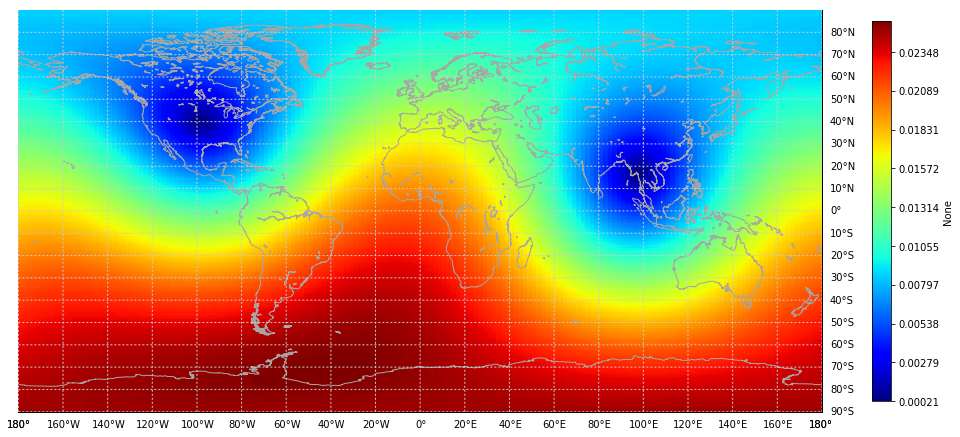

In [5]:
fig      = plt.figure(figsize=(18,10))
ax       = fig.add_subplot(111)
hmap     = eclipse_calc.maps.HamMap(sDate,eDate,ax,show_title=False,**map_prm)
ecl_cmap   = mpl.cm.gray_r
ecl_cmap = mpl.cm.jet

data     = ecl_mags
vmin     = np.min(data)
vmax     = np.max(data)

hmap.overlay_gridsquares(label_precision=0,major_style={'color':'0.8','dashes':[1,1]})
hmap.overlay_gridsquare_data(gs_grid,data,cmap=ecl_cmap,
                vmin=vmin,vmax=vmax,zorder=5)
plt.show()

In [7]:
astropy_data = {'sDate':sDate,'eDate':eDate,'gs_grid':gs_grid,'ll_grid':ll_grid,'ecl_mags':ecl_mags}

In [8]:
import pickle

In [12]:
date_str = sDate.strftime('%Y%m%d-%H%M')
fname   = 'astropy_eclipse_{}.p'.format(date_str)

In [15]:
with open(fname,'wb') as fl:
    pickle.dump(astropy_data,fl)